***Reference:***

**Kapoor, Amita; Gulli, Antonio; Pal, Sujit. Deep Learning with TensorFlow and Keras: Build and deploy supervised, unsupervised, deep, and reinforcement learning models, 3rd Edition . Packt Publishing.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Simple Linear Regression

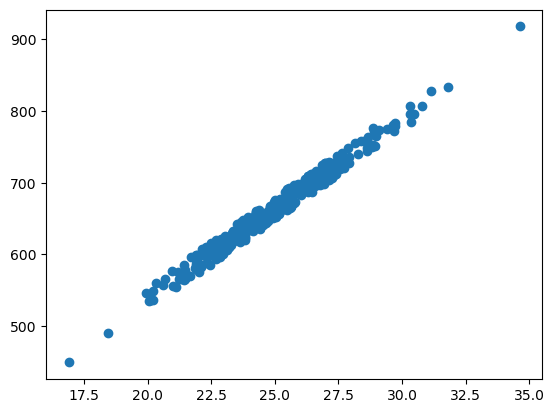

In [2]:
# Generate random data
np.random.seed(42)

area = 2.5 * np.random.randn(300) + 25
price = 25 * area + 5 + np.random.randint(20,50,size=len(area))

data = pd.DataFrame({'area': area, 'price': price})

plt.scatter(data['area'], data['price'])
plt.show();

In [3]:
# Regression Coeffs.
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are", W,b)

The regression coefficients are 25.16207101166747 35.573806193105725


In [4]:
y_pred = W * area + b

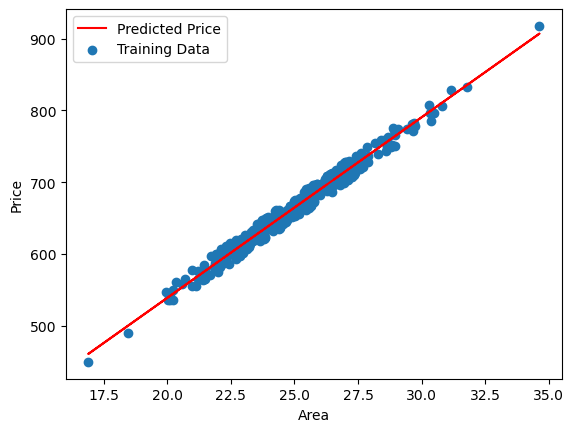

In [5]:
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend();

## Simple Linear Regression - Using Tensorflow

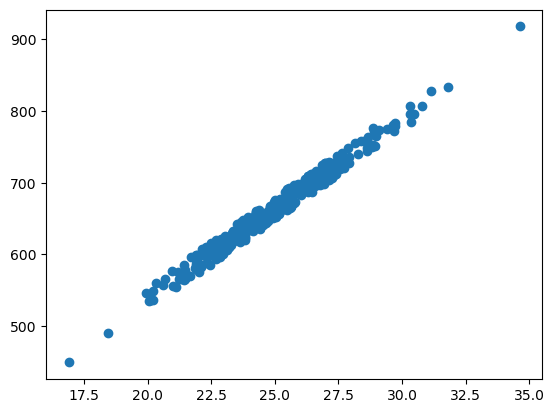

In [6]:
# Generate random data
np.random.seed(42)

area = 2.5 * np.random.randn(300) + 25
price = 25 * area + 5 + np.random.randint(20,50,size=len(area))

data = pd.DataFrame({'area': area, 'price': price})

plt.scatter(data['area'], data['price'])
plt.show();

In [7]:
# Normalize the data
data = (data - data.min())/(data.max() - data.min())

In [8]:
# Set seed
# tf.random.set_seed(42)

# Build the model
model = keras.Sequential([layers.InputLayer(input_shape=[1,]),
                          layers.Dense(1, activation=None)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Fit the model
history= model.fit(data.area, data.price,
                  epochs=100, batch_size=32,
                  verbose=1, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 18ms/step - loss: 0.1361 - val_loss: 0.1066
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0943 - val_loss: 0.0743
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0661 - val_loss: 0.0530
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0472 - val_loss: 0.0384
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 0.0286
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.0221
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0128
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0115
Epoch 11/100
8/8 [==========

In [10]:
y_pred = model.predict(data.area)

10/10 [==============================] - 0s 1ms/step


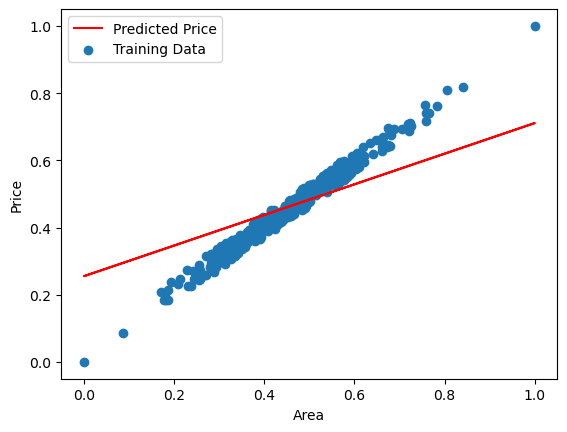

In [11]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend();

In [12]:
model.weights # W, b

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.4557725]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.25522053], dtype=float32)>]